In [1]:
#!pip install librosa
!pip install soundfile

In [3]:
from google.colab import drive

# Mount the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

ls: cannot access '/content/drive/MyDrive': No such file or directory


In [4]:
import glob
import io
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import soundfile as sf
import zipfile

from tqdm import tqdm

In [5]:
def get_images(samples,sr,output_path):

    n_fft = 200

    hop_length = 40
    n_mels=50
    S = librosa.feature.melspectrogram(y=samples,
                                       sr=sr,
                                       n_fft=n_fft,
                                       hop_length=hop_length,
                                       n_mels=n_mels,
                                       fmax=500)
    S_db = librosa.power_to_db(S, ref=np.max)
    fig, ax = plt.subplots(figsize=(2,2))
    librosa.display.specshow(S_db,
                             x_axis='time',
                             y_axis='linear',
                             sr=sr,
                             hop_length=hop_length,
                             )
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, dpi=150, format='png' , bbox_inches='tight', pad_inches=0)
    plt.close()

In [6]:
whale= glob.glob('/content/drive/MyDrive/whale-detection-challenge/whale_data.zip')

for zippath in whale:
    with zipfile.ZipFile(zippath,'r') as zip:
        zip.extractall()
        train_files= glob.glob('data/train/train*.aiff')


# Sound based EDA

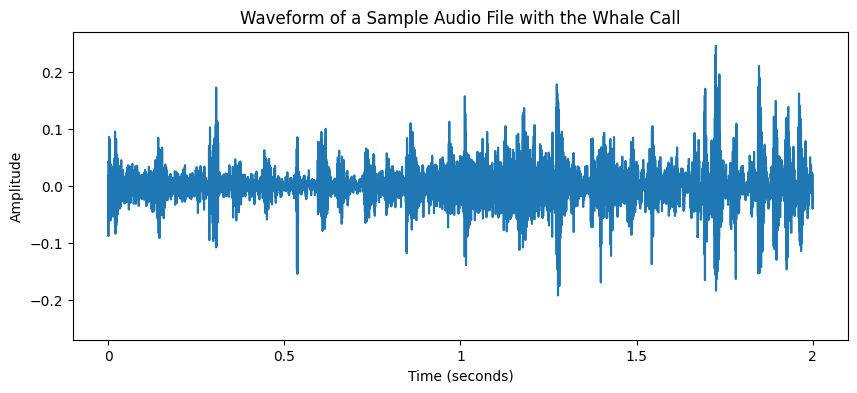

In [ ]:
import librosa
import librosa.display

# Load a random audio file
sample_file = train_files[6]  # Pick the first file or random.choice(train_files)
audio, sr = librosa.load(sample_file, sr=None)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform of a Sample Audio File with the Whale Call")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


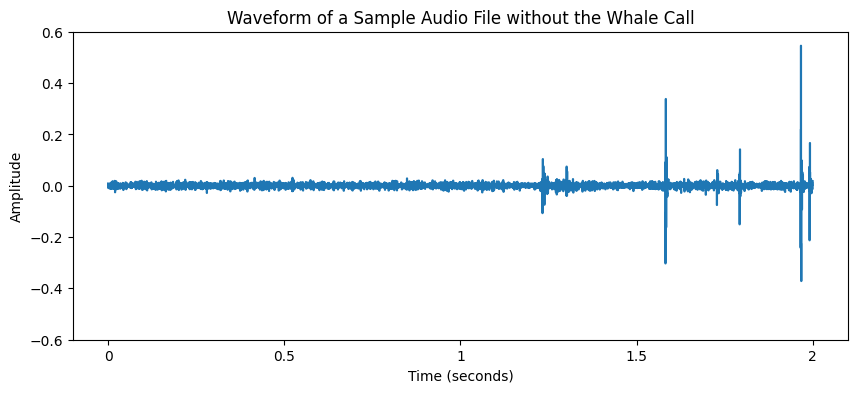

In [ ]:
import librosa
import librosa.display

# Load a random audio file
sample_file = train_files[1]  # Pick the first file or random.choice(train_files)
audio, sr = librosa.load(sample_file, sr=None)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform of a Sample Audio File without the Whale Call")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

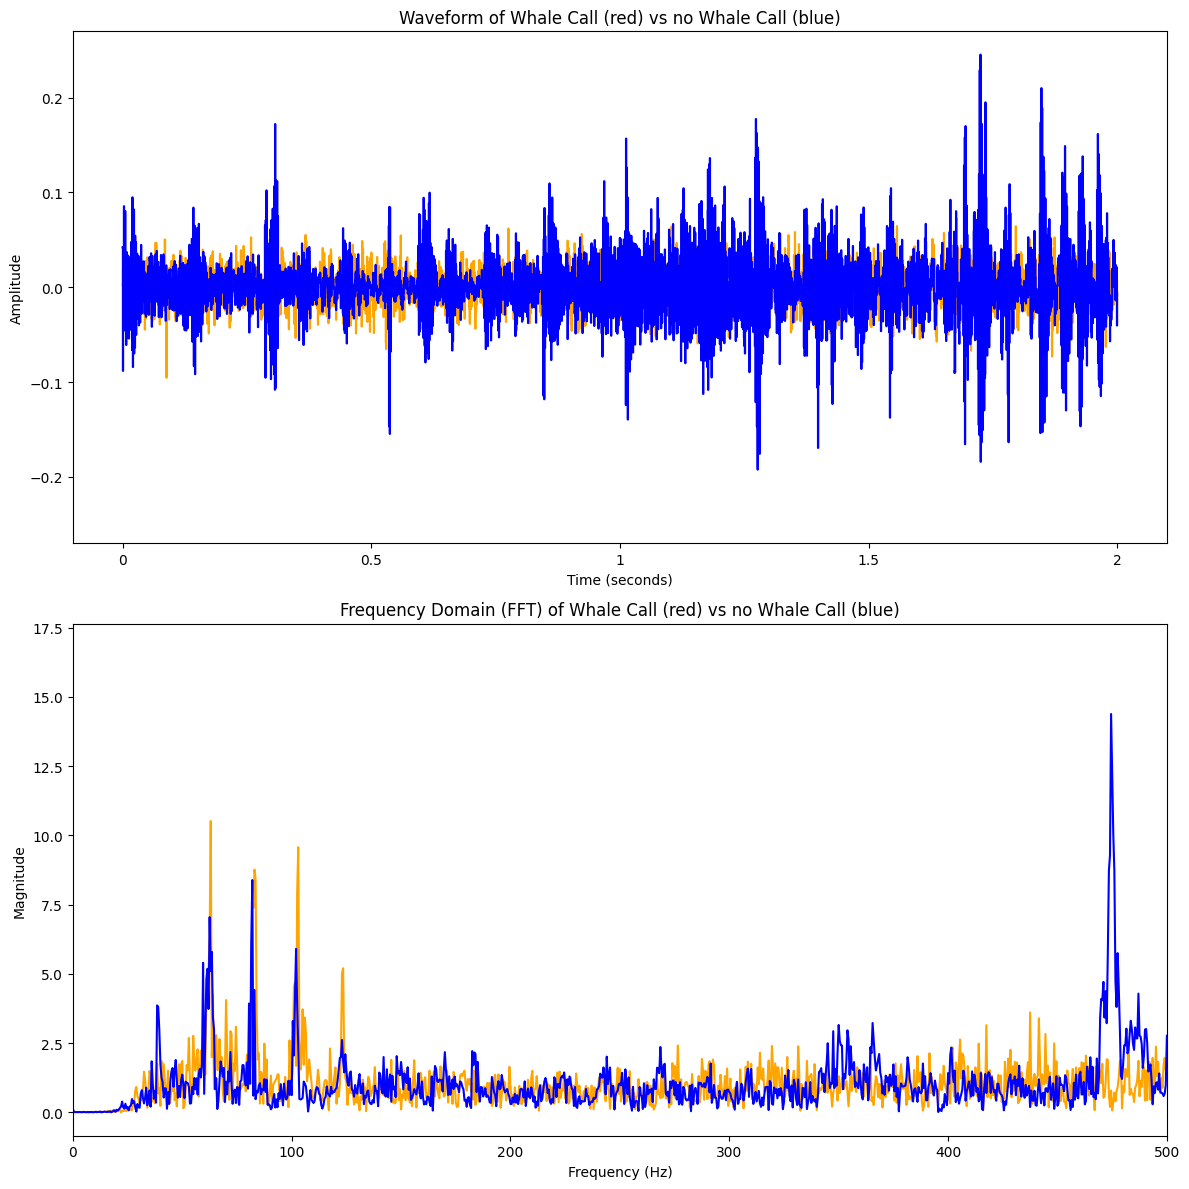

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the waveform and FFT for a given file
def plot_waveform_and_fft(file, ax_waveform, ax_fft, waveform_color, fft_color):
    # Load the audio file
    audio, sr = librosa.load(file, sr=None)  # sr=None preserves the original sampling rate

    # Plot the waveform (time domain)
    librosa.display.waveshow(audio, sr=sr, ax=ax_waveform, color=waveform_color)
    ax_waveform.set_title(f"Waveform of Whale Call (red) vs no Whale Call (blue)")
    ax_waveform.set_xlabel("Time (seconds)")
    ax_waveform.set_ylabel("Amplitude")

    # Perform FFT
    fft = np.fft.rfft(audio)
    frequencies = np.fft.rfftfreq(len(audio), d=1/sr)
    magnitude = np.abs(fft)

    # Plot frequency domain (FFT)
    ax_fft.plot(frequencies, magnitude, color=fft_color)
    ax_fft.set_title(f"Frequency Domain (FFT) of Whale Call (red) vs no Whale Call (blue)")
    ax_fft.set_xlabel("Frequency (Hz)")
    ax_fft.set_ylabel("Magnitude")
    ax_fft.set_xlim(0, 500)  # Focus on 0-500 Hz range for clarity

# Create the plot with two rows and two columns for both files
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for train_files[0] (no whale call), using blue color for waveform and FFT
plot_waveform_and_fft(train_files[0], ax1, ax2, waveform_color='orange', fft_color='orange')

# Plot for train_files[6] (with whale call), using red color for waveform and FFT
plot_waveform_and_fft(train_files[6], ax1, ax2, waveform_color='blue', fft_color='blue')

# Adjust layout
plt.tight_layout()
plt.show()


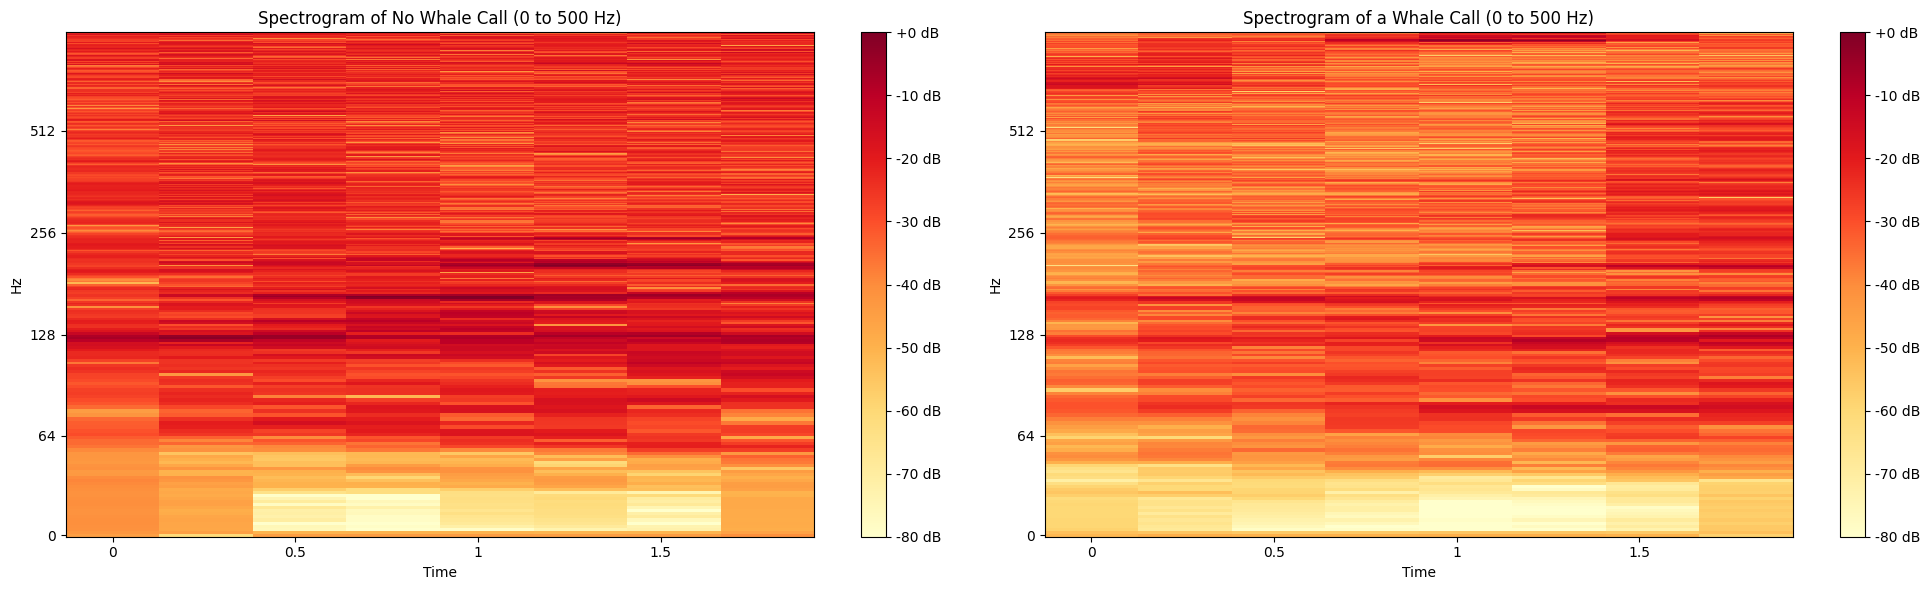

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio files for sample 0 and sample 6
sample_file_0 = train_files[0]  # File for sample 0
sample_file_6 = train_files[6]  # File for sample 6

audio_0, sr_0 = librosa.load(sample_file_0, sr=None)
audio_6, sr_6 = librosa.load(sample_file_6, sr=None)

# Perform Short-Time Fourier Transform (STFT) for both samples
n_fft = 2048
hop_length = 512

D_0 = librosa.stft(audio_0, n_fft=n_fft, hop_length=hop_length)
D_6 = librosa.stft(audio_6, n_fft=n_fft, hop_length=hop_length)

# Convert to decibels
D_db_0 = librosa.amplitude_to_db(np.abs(D_0), ref=np.max)
D_db_6 = librosa.amplitude_to_db(np.abs(D_6), ref=np.max)

# Get the frequency range from 0 to 500 Hz
frequencies_0 = librosa.fft_frequencies(sr=sr_0, n_fft=n_fft)
frequencies_6 = librosa.fft_frequencies(sr=sr_6, n_fft=n_fft)

freq_mask_0 = frequencies_0 <= 500
freq_mask_6 = frequencies_6 <= 500

D_db_0 = D_db_0[freq_mask_0, :]
D_db_6 = D_db_6[freq_mask_6, :]

# Plot the spectrograms side by side
plt.figure(figsize=(20, 6))

# Sample 0
plt.subplot(1, 2, 1)
librosa.display.specshow(D_db_0, sr=sr_0, x_axis='time', y_axis='log', cmap='YlOrRd')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of No Whale Call (0 to 500 Hz)")

# Sample 6
plt.subplot(1, 2, 2)
librosa.display.specshow(D_db_6, sr=sr_6, x_axis='time', y_axis='log', cmap='YlOrRd')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of a Whale Call (0 to 500 Hz)")

plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np
import os
import pandas as pd

# List of files (assuming `train_files` is already defined)
features = []
for file in train_files:
    # Load the audio file
    audio, sr = librosa.load(file, sr=None)

    # Calculate features
    zcr = np.mean(librosa.feature.zero_crossing_rate(audio).squeeze())  # Zero-crossing rate
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr).squeeze())  # Spectral centroid
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr).squeeze())  # Spectral bandwidth
    rms = np.mean(librosa.feature.rms(y=audio).squeeze())  # Root mean square energy

    features.append({'file': os.path.basename(file), 'zcr': zcr, 'centroid': spectral_centroid, 'bandwidth': spectral_bandwidth, 'rms': rms})

# Convert to DataFrame
features_df = pd.DataFrame(features)
print(features_df[:10])

# Summary statistics for the features
print(features_df.describe())


              file       zcr    centroid   bandwidth       rms
0  train29439.aiff  0.320984  432.986299  251.434912  0.017729
1  train12236.aiff  0.462402  523.198573  199.361783  0.013115
2  train26273.aiff  0.355530  446.021947  212.914020  0.003949
3  train10795.aiff  0.354736  450.191904  203.041544  0.022015
4  train22709.aiff  0.309692  445.512994  245.163046  0.014039
5  train24601.aiff  0.442078  532.756856  192.419109  0.003674
6   train5246.aiff  0.452881  556.705369  227.397589  0.032716
7  train13905.aiff  0.277649  375.170986  234.281797  0.001369
8  train29020.aiff  0.437622  492.512058  232.686208  0.001221
9  train29639.aiff  0.398926  487.714407  215.717788  0.146086
                zcr      centroid     bandwidth           rms
count  30000.000000  30000.000000  30000.000000  30000.000000
mean       0.403201    492.880302    218.223716      0.027496
std        0.077164     64.169465     18.537006      0.050910
min        0.048523    181.770075    113.231692      0.0000

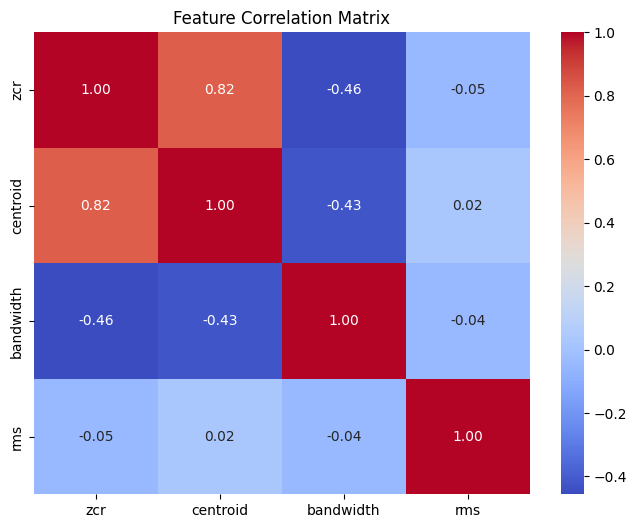

In [ ]:
import seaborn as sns

# Correlation matrix
correlation_matrix = features_df[['zcr', 'centroid', 'bandwidth', 'rms']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()



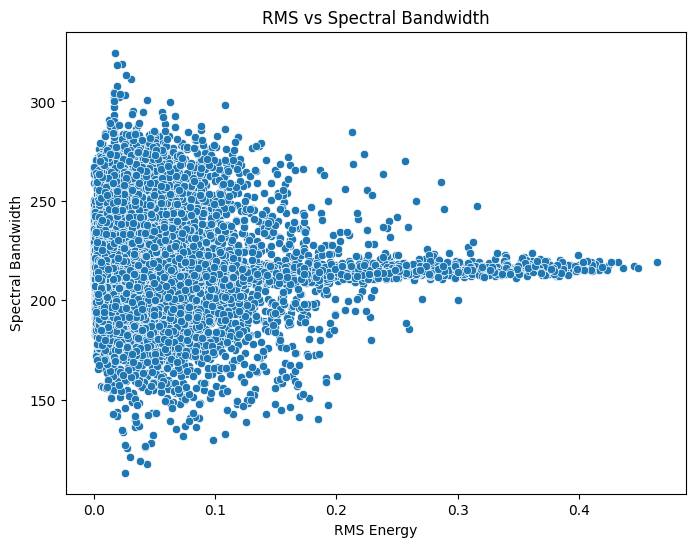

In [ ]:
# Scatter plot of RMS vs Spectral Bandwidth
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features_df, x='rms', y='bandwidth')
plt.title("RMS vs Spectral Bandwidth")
plt.xlabel("RMS Energy")
plt.ylabel("Spectral Bandwidth")
plt.show()


In [ ]:
len(whale)

1

# Dont run below cell, images already cralwed and saved

In [ ]:
'''
output_path= ''
zip_file = 'spectrograms.zip'


with zipfile.ZipFile(zip_file, 'w') as myzip:
    for input_file in tqdm(train_files,desc='Proccesing files'):
        # Load the audio file
        audio_data, sr = sf.read(input_file)

        # Generate the spectrogram and save it with a unique name in the output directory
        output_file = os.path.join(output_path, os.path.splitext(os.path.basename(input_file))[0] + '.png')
        get_images(audio_data, sr, output_file)

        # Add the spectrogram file to the zip file
        myzip.write(output_file)

        # Delete the spectrogram file
        os.remove(output_file)

'''

"\noutput_path= ''\nzip_file = 'spectrograms.zip'\n\n\nwith zipfile.ZipFile(zip_file, 'w') as myzip:\n    for input_file in tqdm(train_files,desc='Proccesing files'):\n        # Load the audio file\n        audio_data, sr = sf.read(input_file)\n\n        # Generate the spectrogram and save it with a unique name in the output directory\n        output_file = os.path.join(output_path, os.path.splitext(os.path.basename(input_file))[0] + '.png')\n        get_images(audio_data, sr, output_file)\n\n        # Add the spectrogram file to the zip file\n        myzip.write(output_file)\n\n        # Delete the spectrogram file\n        os.remove(output_file)\n\n"

In [ ]:
!cp /content/spectrograms.zip /content/drive/MyDrive/spectrograms.zip


cp: cannot stat '/content/spectrograms.zip': No such file or directory


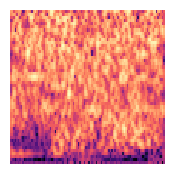

In [ ]:
#EXAMPLE

samples, sr = sf.read(train_files[8])

n_fft = 200
hop_length = 40
n_mels=50
S = librosa.feature.melspectrogram(y=samples,
                                   sr=sr,
                                   n_fft=n_fft,
                                   hop_length=hop_length,
                                   n_mels=n_mels,
                                   fmax=500)
S_db = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(2,2))
librosa.display.specshow(S_db,
                         x_axis='time',
                         y_axis='linear',
                         sr=sr,
                         hop_length=hop_length,
                         )
plt.axis('off')
plt.show()

In [9]:
zipfiles = glob.glob('/content/drive/MyDrive/whale-detection-challenge/whale_data.zip')

for zippath in zipfiles:
    with zipfile.ZipFile(zippath, 'r') as zip_file:
        zip_file.extract('data/train.csv')
        training_labels = pd.read_csv(zip_file.open('data/train.csv'))

In [10]:
training_labels
training_labels.rename({'clip_name':'image_name'},axis=1,inplace=True)
training_labels['image_name'] = training_labels['image_name'].str.replace('.aiff', '')
training_labels.head(6)

,image_name,label
0,train1,0
1,train2,0
2,train3,0
3,train4,0
4,train5,0
5,train6,1


# Clustering features extracted

[[13838  9135]
 [ 4171  2856]]
              precision    recall  f1-score   support

           0       0.77      0.60      0.68     22973
           1       0.24      0.41      0.30      7027

    accuracy                           0.56     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.64      0.56      0.59     30000



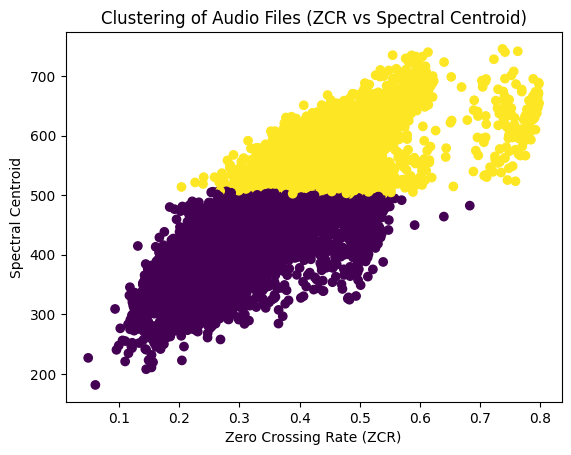

In [ ]:
import librosa
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report


labels = np.array(training_labels)

labels_df = pd.DataFrame(labels, columns=['file', 'label'])

# Extract the labels as a separate array
labels = labels_df['label'].values
labels = labels.astype(int)
# Assuming 'file' is part of the DataFrame and needs to be dropped
features_df = features_df.drop(columns=['file'])
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(features_df)

# Compare clusters with true labels
print(confusion_matrix(labels, kmeans_labels))
print(classification_report(labels, kmeans_labels))

# Optional: Visualize the clustering (for 2D visualization)
import matplotlib.pyplot as plt
plt.scatter(features_df['zcr'], features_df['centroid'], c=kmeans_labels, cmap='viridis')
plt.xlabel('Zero Crossing Rate (ZCR)')
plt.ylabel('Spectral Centroid')
plt.title('Clustering of Audio Files (ZCR vs Spectral Centroid)')
plt.show()


Confusion Matrix:
 [[13908  9065]
 [14075  8898]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.61      0.55     22973
           1       0.50      0.39      0.43     22973

    accuracy                           0.50     45946
   macro avg       0.50      0.50      0.49     45946
weighted avg       0.50      0.50      0.49     45946



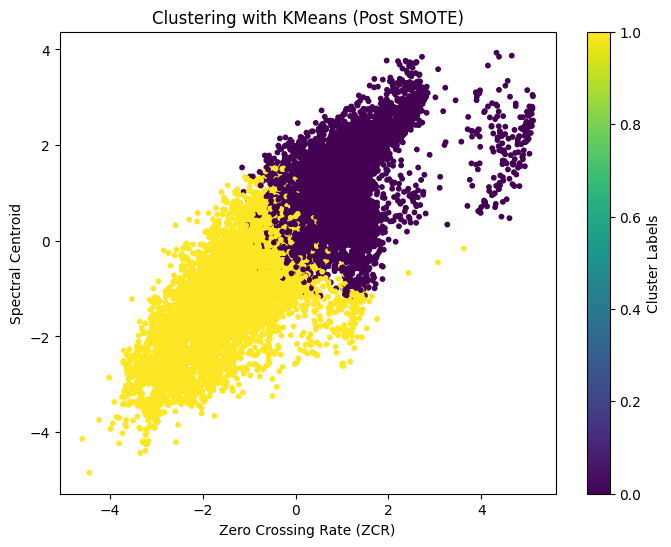

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # SMOTE to handle class imbalance
from sklearn.cluster import KMeans  # Alternative clustering algorithm
import matplotlib.pyplot as plt

# Normalize the features for better clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Address class imbalance using SMOTE (oversample the minority class)
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features_scaled, labels)

# Apply KMeans clustering instead of DBSCAN for better performance on imbalanced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(features_resampled)

# Compare clusters with true labels
print("Confusion Matrix:\n", confusion_matrix(labels_resampled, kmeans_labels))
print("\nClassification Report:\n", classification_report(labels_resampled, kmeans_labels))

# Visualize clustering
plt.figure(figsize=(8, 6))
plt.scatter(features_resampled[:, 0], features_resampled[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.xlabel('Zero Crossing Rate (ZCR)')
plt.ylabel('Spectral Centroid')
plt.title('Clustering with KMeans (Post SMOTE)')
plt.colorbar(label='Cluster Labels')
plt.show()


# CNNs

In [ ]:
!ls

data  drive  sample_data


In [11]:
import os
import zipfile

# Unzip the file
zip_file = '/content/drive/MyDrive/spectrograms.zip'
output_dir = './dataset'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Files extracted to: {output_dir}")


Files extracted to: ./dataset


In [12]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Map image paths
training_labels['image_path'] = training_labels['image_name'].apply(lambda x: os.path.join(output_dir, f"{x}.png"))

# Split data into training and validation
train_data = training_labels.sample(frac=0.8, random_state=42)
val_data = training_labels.drop(train_data.index)

# Convert 'label' column to strings
train_data['label'] = train_data['label'].astype(str)
val_data['label'] = val_data['label'].astype(str)

# Prepare ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_gen = datagen.flow_from_dataframe(
    train_data,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='binary'
)

val_gen = datagen.flow_from_dataframe(
    val_data,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 24000 validated image filenames belonging to 2 classes.
Found 6000 validated image filenames belonging to 2 classes.


# CNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a basic CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define a more complex CNN
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fourth convolutional block with larger filter size
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,142,209 (19.62 MB)

 Trainable params: 5,141,249 (19.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - accuracy: 0.7936 - loss: 0.9740 - val_accuracy: 0.8605 - val_loss: 0.2674
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.8541 - loss: 0.2970 - val_accuracy: 0.8702 - val_loss: 0.2459
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.8641 - loss: 0.2741 - val_accuracy: 0.8845 - val_loss: 0.2246
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 74ms/step - accuracy: 0.8840 - loss: 0.2359 - val_accuracy: 0.8825 - val_loss: 0.2547
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.8977 - loss: 0.2105 - val_accuracy: 0.9173 - val_loss: 0.1779


# CNN with an Attention Mechanism

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Attention, Input, Reshape
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Reshape
from tensorflow.keras.layers import Attention  # Import Attention explicitly
import tensorflow as tf

# Define a CNN with an attention mechanism
input_layer = Input(shape=(128, 128, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

reshape_layer = Reshape((-1, x.shape[-1]))(x)

# Attention mechanism
# Instead of applying attention to the CNN feature maps directly, apply to the reshape:
attention_output = Attention()([reshape_layer, reshape_layer])

# Reshape to original:
# Reshape the output to the original dimensions of the feature maps.
x = Reshape(x.shape[1:])(attention_output)

# Flatten and fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

# Define the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



history = model.fit(
    train_gen,
    validation_data=val_gen,
    steps_per_epoch=len(train_data) // 32,  # Adjust to your batch size
    validation_steps=len(val_data) // 32,  # Adjust to your batch size
    epochs=15  # Adjust number of epochs as needed
)



Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 128, 128, 32)   │            896 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_18          │ (None, 64, 64, 32)     │              0 │ conv2d_18[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_18[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_19          │ (None, 32, 32, 64)     │              0 │ conv2d_19[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_5 (Reshape)       │ (None, 1024, 64)       │              0 │ max_pooling2d_19[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_4 (Attention)   │ (None, 1024, 64)       │              0 │ reshape_5[0][0],       │
│                           │                        │                │ reshape_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_6 (Reshape)       │ (None, 32, 32, 64)     │              0 │ attention_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_9 (Flatten)       │ (None, 65536)          │              0 │ reshape_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 128)            │      8,388,736 │ flatten_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 128)            │              0 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 1)              │            129 │ dropout_10[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,408,257 (32.07 MB)

 Trainable params: 8,408,257 (32.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.7721 - loss: 0.5235 - val_accuracy: 0.7914 - val_loss: 0.4320
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.4829
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.7954 - loss: 0.4273 - val_accuracy: 0.8010 - val_loss: 0.4146
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2296
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.7999 - loss: 0.4192 - val_accuracy: 0.8035 - val_loss: 0.4244
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3925
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.8004 - loss: 0.4098 - val_accuracy: 0.8107 - val_loss: 0.4003
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.0

### Using Sincnet

In [17]:
!pip install torch torchaudio



In [18]:
!git clone https://github.com/mravanelli/SincNet.git

Cloning into 'SincNet'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 226 (delta 0), reused 2 (delta 0), pack-reused 223 (from 1)
Receiving objects: 100% (226/226), 80.84 MiB | 42.76 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [19]:
import librosa
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
# Correct the import statement to import from the specific file where SincNet is defined
from SincNet.dnn_models import SincNet as SincNet_Model  # Assuming SincNet is in dnn_models.py within the SincNet folder


# Prepare audio data and labels
class AudioDataset(Dataset):
    def __init__(self, file_paths, labels, sample_rate=16000, duration=5):
        self.file_paths = file_paths
        self.labels = labels
        self.sample_rate = sample_rate
        self.duration = duration  # Duration of each audio clip (in seconds)
        self.samples = int(sample_rate * duration)

    def __getitem__(self, index):
        file_path = self.file_paths[index]
        label = self.labels[index]

        # Load the audio file
        audio, sr = librosa.load(file_path, sr=self.sample_rate)

        # Pad or truncate the audio to the target length
        if len(audio) > self.samples:
            audio = audio[:self.samples]
        else:
            audio = np.pad(audio, (0, self.samples - len(audio)), mode='constant')

        # Convert to tensor
        audio = torch.tensor(audio, dtype=torch.float32)

        return audio, label

    def __len__(self):
        return len(self.file_paths)



train_labels = training_labels['label'].tolist()



In [20]:
# Initialize dataset and dataloader
dataset = AudioDataset(train_files, train_labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check data loading
for audio, label in dataloader:
    print(audio.shape, label)
    break

torch.Size([32, 80000]) tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0])


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from SincNet.dnn_models import SincNet  # Importing the SincNet model
from torch.utils.data import DataLoader

# Define the classification model using SincNet as the feature extractor
class SincNetAudioClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super(SincNetAudioClassifier, self).__init__()
        self.sincnet = SincNet(options={'input_dim': input_dim, 'fs': 16000})  # Initialize SincNet
        self.fc1 = nn.Linear(2048, 128)  # Example hidden layer size (adjust based on SincNet output)
        self.fc2 = nn.Linear(128, num_classes)  # Final layer for classification

    def forward(self, x):
        x = self.sincnet(x)  # SincNet feature extraction
        x = torch.relu(self.fc1(x))  # Fully connected layer with ReLU activation
        x = self.fc2(x)  # Output layer
        return x

# Initialize model, loss, and optimizer
input_dim = 80000  # Example input size (5 seconds at 16kHz sample rate)
num_classes = 2  # Binary classification
model = SincNetAudioClassifier(input_dim=input_dim, num_classes=num_classes)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = correct / total * 100
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}, Accuracy: {accuracy:.2f}%")

# Start training
train_model(model, dataloader, criterion, optimizer, num_epochs=10)


KeyError: 'cnn_N_filt'

In [ ]:
import librosa
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from SincNet.dnn_models import SincNet as SincNet_Model  # Correct path to SincNet

# Prepare audio data and labels
class AudioDataset(Dataset):
    def __init__(self, file_paths, labels, sample_rate=16000, duration=5):
        self.file_paths = file_paths
        self.labels = labels
        self.sample_rate = sample_rate
        self.duration = duration  # Duration of each audio clip (in seconds)
        self.samples = int(sample_rate * duration)

    def __getitem__(self, index):
        file_path = self.file_paths[index]
        label = self.labels[index]

        # Load the audio file
        audio, sr = librosa.load(file_path, sr=self.sample_rate)

        # Pad or truncate the audio to the target length
        if len(audio) > self.samples:
            audio = audio[:self.samples]
        else:
            audio = np.pad(audio, (0, self.samples - len(audio)), mode='constant')

        # Convert to tensor
        audio = torch.tensor(audio, dtype=torch.float32)

        return audio, label

    def __len__(self):
        return len(self.file_paths)


# Assuming you have a pandas DataFrame `training_labels` and a list of file paths
# Example: train_labels = training_labels['label'].tolist(), file_paths = training_labels['file_path'].tolist()

train_labels = training_labels['label'].tolist()
train_file_paths = training_labels['file_path'].tolist()

# Create the AudioDataset instance
train_dataset = AudioDataset(file_paths=train_file_paths, labels=train_labels)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the SincNet model (make sure the SincNet model path is correct)
model = SincNet_Model(input_size=16000, num_classes=2)  # Adjust `num_classes` based on your dataset
model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to('cuda' if torch.cuda.is_available() else 'cpu'), labels.to('cuda' if torch.cuda.is_available() else 'cpu')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_preds += labels.size(0)
        correct_preds += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Optionally, save the model after training
torch.save(model.state_dict(), "sincnet_model.pth")


KeyError: 'file_path'